In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
sys.path.insert(0, 'utils/')
from factorizer import *
import ssd
import palettable
from scipy.interpolate import griddata
from palettable.cartocolors.qualitative import Prism_8
import matplotlib as mpl
import pickle
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
fig_path = "./figures/BBQ/"

In [6]:
lamb2_range = 10**(np.linspace(np.log10(1e-3),np.log10(1.5),25))
lamb1_range = 10**(np.linspace(np.log10(1e-4),np.log10(1e-2),25))
lamb1_fixed = [1e-4]
lamb2_fixed = [1e-3]
directory = "pickled_factorizers_6_19"
mode = f"bbq"
print(mode)
fcts = pickle.load(open(f"{directory}/{mode}","rb"))

bbq


In [7]:
yrange = (0,.2)
xrange = (0,8)
figsize = (3,5)
xt =[2,4,6,8]
name = "BBQ"
fct = fcts[(name ,None,None)]
K = fct.computed_params(printout = False)[0][1]
print(K)
if False:
    fct_rots = [fcts[(name, None, i)] for i in [3,4,5]] 
    rotate = "loci"
    #plot_rotation_test(fct, fct_rot, K, lamb1_fixed, lamb2_range, xrange, yrange, rotate, fs = 20, svd_k=K, true_line = False, save_name = fig_path + "Mrot_" + mode + ".pdf")
    plot_rotation_test_w_error(fct, fct_rots, K, lamb1_fixed, lamb2_range, xrange, yrange, rotate, fs = 20, svd_k=K, true_line = False, save_name = None, figsize = figsize, xticks = xt, oc='tab:red', rotc='dimgrey', labels= True, legend = False)
    plot_rotation_test_w_error(fct, fct_rots, K, lamb1_fixed, lamb2_range, xrange, yrange, rotate, fs = 20, svd_k=K, true_line = False, save_name = f"{fig_path}/{rotate}_rot_test.svg", figsize = figsize, xticks = xt, oc='tab:red', rotc='dimgrey', labels= False, legend = False)


    fct_rots = [fcts[(name, i, None)] for i in [0,1,2]] 
    rotate = "env"
    #plot_rotation_test(fct, fct_rot, K, lamb1_range, lamb2_fixed, xrange, yrange, rotate, fs = 20, svd_k=K, true_line = False, save_name =  fig_path + "Wrot_" + mode + ".pdf")
    plot_rotation_test_w_error(fct, fct_rots, K, lamb1_range, lamb2_fixed, xrange, yrange, rotate, fs = 20, svd_k=K, true_line = False, save_name = None, figsize = figsize, xticks = xt, oc='tab:blue', rotc='dimgrey', labels= True, legend = False)
    plot_rotation_test_w_error(fct, fct_rots, K, lamb1_range, lamb2_fixed, xrange, yrange, rotate, fs = 20, svd_k=K, true_line = False, save_name = f"{fig_path}/{rotate}_rot_test.svg", figsize = figsize, xticks = xt, oc='tab:blue', rotc='dimgrey', labels= False, legend = False)


8


('reg', 8, (0.0012, 0.4433), (0, 0)) 3.710710710710711 2.0555555555555554 8 0.045594484405667546


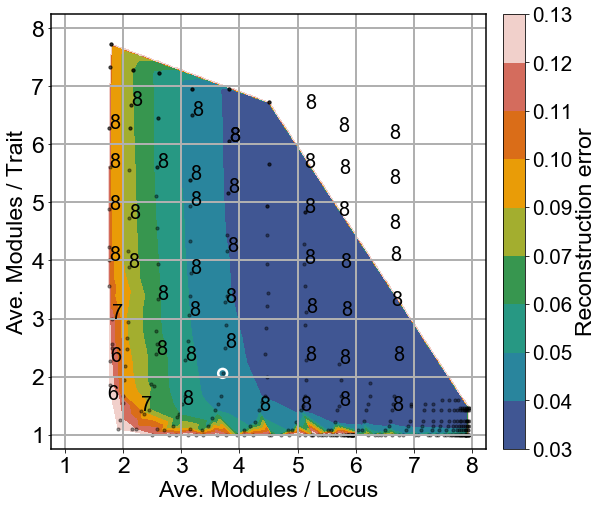

In [28]:
ve = .25
minx = 1-ve
maxx = K+ve
miny = 1-ve
maxy = K+ve
vmax = 0.13
vmin = 0.03

kpts = []
for i in np.linspace(1.5,6.5,7):
    for j in np.linspace(1.5,6.5,7):
        kpts.append((i,j))
pt = (3.5, 2.1)
labeled_points = [pt]
plot_solution_space(fct, K, lamb1_range,lamb2_range, minx, maxx, miny, maxy, vmax, vmin,fs = 23,\
                    scatter=True, scatter_restricted=True, restrict_in_range = True, k_labeled_points = kpts , circled_points = labeled_points, save_name = fig_path + "sols_" + mode + ".pdf")

W: plot



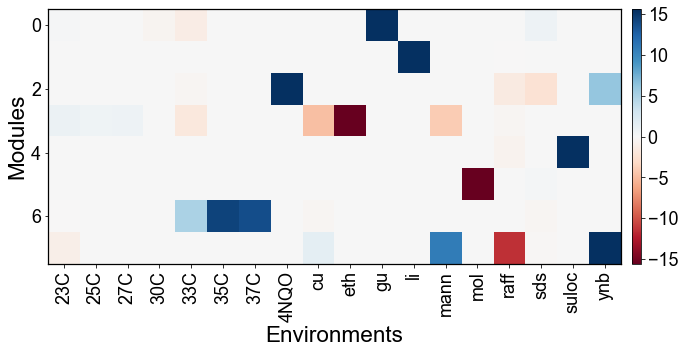

In [30]:
p = fct.find_key(pt[0],pt[1])
plot_Ws(fct, p, pp = 97, labelsize = 18,save_name = fig_path + "W_" + mode + ".pdf")
#filtl =  np.max(np.abs(F),axis=0) > 0.005
#plot_Ms(fct, p, pp = 100, restricted = filtl, two_line= True, labelsize = 24, max_cols = 120, save_name = fig_path + "M_" + mode + ".pdf")
#display_modularity(fct, p, save_name =  fig_path + "modhist_" + mode + ".pdf")


## names of loci

In [59]:
M = fct.M_preds[p]
W = fct.W_preds[p]

In [61]:
results_dir = "../QTL/BBQ_results_6_15"
cc= "0.99"
lt1 ="0.0"
lt2 = "0.003"
width = "50"
std = "2"
new_dir = f"{results_dir}/CI_after_localization_round_2_cc_{cc}_lt2_{lt2}_width_{width}_std_{std}_orf_and_anno"


In [62]:
loci_to_possible_orfs_d = pickle.load(open(f"{new_dir}/loci_to_possible_orfs_d", "rb"))

In [63]:
df=pd.read_csv(f'{new_dir}/orf_info.csv')
df=df.set_index('0')

In [85]:
for _ in df["Standard Gene Name"]:
    if _[:3]=="RSF":
        print(_)

TypeError: 'float' object is not subscriptable

In [65]:
loci_to_label_d = {}
for _ in loci_to_possible_orfs_d:
    to_add = []
    if len(loci_to_possible_orfs_d[_]) == 0:
        loci_to_label_d[_]= f"Unannotated loci near {_}"
    else:
        for orf in loci_to_possible_orfs_d[_]:
            gene_name = df.loc[orf, "Standard Gene Name"]
            if gene_name is np.NaN:
                to_add.append(orf)
            else:
                to_add.append(gene_name)
        loci_to_label_d[_]=" or ".join(to_add)

In [66]:
for _ in fct.loci_names:
    if _ not in loci_to_label_d.keys():
        loci_to_label_d[_]=f"never localized {_}"

In [67]:
loci_to_func_d ={}
for key in loci_to_possible_orfs_d:
    if len(loci_to_possible_orfs_d[key])== 1:
        loci_to_func_d[key]=df.loc[loci_to_possible_orfs_d[key][0], "GO_Function"]

In [68]:
loci_to_proc_d ={}
for key in loci_to_possible_orfs_d:
    if len(loci_to_possible_orfs_d[key])== 1:
        loci_to_proc_d[key]=df.loc[loci_to_possible_orfs_d[key][0], "GO_Process"]

In [69]:
thresh = .1

In [70]:
fct.loci_names.shape

(491,)

In [71]:
len(loci_to_possible_orfs_d.keys())

110

In [72]:
Z = np.argsort(np.abs(M), axis = -1)[:,-25:]
to_write = []
for i in range(M.shape[0]):
    envs = " ".join([fct.env_names[_] for _ in list((np.where(np.abs(W[:,i])>0))[0])])
    print(f"\nModule {i} {envs}")
    to_write.append(f"Module {i} {envs}\n")
    pos = list(Z[i,...])[::-1]
    for j in pos:
        if np.abs(M[i,j])>thresh:
            po = loci_to_possible_orfs_d[fct.loci_names[j]]
            if len(po)>1 or len(po)==0:
                to_add = " or ".join(po)
                to_add = to_add + "\t\t\t\t\t\t\t"
            else:
                to_add = po[0] +"\t"+"\t".join([str(z) for z in df.loc[po[0]]])
            line = f"{M[i,j]:.2f}\t{j}\t{fct.loci_names[j]}\t{to_add}" 
            print(line)
            to_write.append(line + "\n")


Module 0 23C 30C 33C 35C 37C gu li mann raff sds suloc
-0.56	341	30645	YLL058W	nan	nan	Putative protein of unknown function with similarity to Str2p	Putative protein of unknown function with similarity to Str2p; Str2p is a cystathionine gamma-synthase important in sulfur metabolism; YLL058W is not an essential gene	nan	nan	nan
-0.51	76	7117	YDR040C	ENA1	Exitus NAtru (Latin, "exit sodium")	P-type ATPase sodium pump	P-type ATPase sodium pump; involved in Na+ and Li+ efflux to allow salt tolerance	nan	transmembrane transporter activity (6)	response to osmotic stress (6) transmembrane transport (5) ion transport (4) response to starvation (2)
-0.33	75	7115	YDR038C	ENA5	Exitus NAtru (Latin, "exit sodium")	Protein with similarity to P-type ATPase sodium pumps	Protein with similarity to P-type ATPase sodium pumps; member of the Na+ efflux ATPase family	nan	transmembrane transporter activity (6)	transmembrane transport (5) ion transport (4)
0.21	313	28215	YLR256W	HAP1	Heme Activator Protein	Z

In [73]:
F = open(f"{new_dir}/mod_anno.tsv", "w")
F.writelines(to_write)
F.close()

In [74]:
Z = np.argsort(np.abs(M), axis = -1)[:,-10:]
for i in range(M.shape[0]):
    print(f"\nModule {i}")
    pos = list(Z[i,...])[::-1]
    for j in pos:
        if fct.loci_names[j] in  loci_to_func_d:
            print(f"{M[i,j]:.2f}\t{fct.loci_names[j]}\t{loci_to_label_d[fct.loci_names[j]]}\t{loci_to_func_d[fct.loci_names[j]]}")
        else:
            print(f"{M[i,j]:.2f}\t{fct.loci_names[j]}\t{loci_to_label_d[fct.loci_names[j]]}")

        


Module 0
-0.56	30645	YLL058W	nan
-0.51	7117	ENA1	transmembrane transporter activity (6)
-0.33	7115	ENA5	transmembrane transporter activity (6)
0.21	28215	HAP1	DNA binding (12) DNA-binding transcription factor activity (5)
0.20	20780	HAL5	kinase activity (10)
-0.14	34730	MKT1	nuclease activity (3)
0.13	28220	YLRWdelta15 or YLRWsigma3
0.12	30743	BUL2	transferase activity (5)
0.11	28211	HAP1	DNA binding (12) DNA-binding transcription factor activity (5)
-0.10	34743	PMS1	DNA binding (12) ATP hydrolysis activity (3) ion binding (2)

Module 1
-0.80	7117	ENA1	transmembrane transporter activity (6)
-0.46	7115	ENA5	transmembrane transporter activity (6)
-0.11	7124	YOS9 or EMC10 or TGL2
-0.09	30743	BUL2	transferase activity (5)
-0.08	6859	PUS9	isomerase activity (2)
-0.08	7135	YDR059C_mRNA or MAK21
-0.08	7142	MAK21 or YDR061W
-0.07	33066	SKY1	kinase activity (10)
-0.07	36231	HAL9	DNA binding (12)
-0.06	14472	YGL007C-A or BRP1

Module 2
-0.75	34730	MKT1	nuclease activity (3)
-0.36	34743	PMS1	DNA

## Sankey

In [75]:
M = fct.M_preds[p]
W = fct.W_preds[p]

In [76]:
thresh = .15
MM = np.abs(M)
WW = np.abs(W)
dont_flip = np.where(np.sum(W, axis = 0)>0)[0]
print(dont_flip)
keep = MM.max(axis = 0)>thresh
M = M[:, keep]
MM = MM[:, keep]
print(MM.shape)

[1 2 3 5 6]
(7, 26)


In [77]:
names = []
for _ in range(keep.shape[0]):
    if keep[_]:
        names.append(loci_to_label_d[fct.loci_names[_]])
    

In [78]:
res = []
for i in range(M.shape[0]):
    total = 0
    displayed = 0
    for j in range(M.shape[1]):
        if np.abs(M[i,j])>thresh: 
            displayed += np.abs(M[i,j])
        total += np.abs(M[i,j])
    res.append(total - displayed)

In [79]:
print(res)

[0.5692331009045244, 0.4041203717205881, 0.47591931076740734, 0.559464183610809, 0.38338802087533974, 0.5421629704861632, 0.12378917354171648]


In [80]:
import plotly.express as px

In [81]:
label = [f"Mod. {i}" for i in range(MM.shape[0])] + names + fct.env_names  +["all other effects"]
source = []
target = []
value = []
color = []
if False:
    for i in range(MM.shape[0]):
        target.append(i)
        source.append(len(label)-1)
        value.append(res[i])
        color.append('white')

    
for i in range(MM.shape[0]):
    for j in range(MM.shape[1]):
        if MM[i,j]<thresh: continue
        target.append(i)
        source.append(j+MM.shape[0])
        value.append(MM[i,j])
        #if M[i,j]<0:
        #print(label[j+MM.shape[0]], label[i], i in dont_flip, M[i,j]<0,(2*(i in dont_flip)-1) * M[i,j]<0 )
        #print(MM[i,j],M[i,j],(2*(i in dont_flip)-1) * M[i,j] )
        if (2*(i in dont_flip)-1) * M[i,j]<0:
            color.append(px.colors.qualitative.Set1[i])
        else: 
            color.append(px.colors.qualitative.Pastel1[i])

    
    
for i in range(WW.shape[1]):
    for j in range(WW.shape[0]):
        source.append(i)
        target.append(j+MM.shape[0]+MM.shape[1])
        value.append(WW[j,i]/50)
        #if W[j,i]<0:
        if (2*(i in dont_flip)-1) * W[j,i]<0:
            color.append('rgb(70,70,70)')
        else: 
            color.append(px.colors.qualitative.Pastel2[-1])

In [82]:
import plotly.graph_objects as go
import plotly.io as pio
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = label,
      color = "black"

    ),
    link = dict(
      source = source,
      target = target,
      value = value,
      color = color
  ))])

fig.update_layout(title_text="Module map", font_size=16,  width=700, height=1200)
fig.show()
pio.write_image(fig, "sankey.svg")